## Importing 

In [74]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import healpy as hp
import astropy.units as u
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from tqdm.notebook import tqdm

def loadfits(filename): 
    '''
    Return the HDU,central pixel wavelength and velocity gradient.
    '''
    file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)
    HDU = file[1]
    vel_grd = HDU.header['1CDLT6']         # Velocity gredient
    cen_pix = '%3d'%(HDU.header['1CRPX6']) 
    return HDU,cen_pix,vel_grd

In [130]:
for file in os.listdir('/data/cassegrain/HI4Pi/HEALPix/'):
    a,b,c = loadfits(file)

    print(b)

466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466
466


In [9]:
gnom_proj_file = fits.open("/data/cassegrain/HI4Pi/TAN/TAN_E01.fits")

In [10]:
gnom_proj_file.info()

Filename: /data/cassegrain/HI4Pi/TAN/TAN_E01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (269, 274, 933)   float32   


In [11]:
gnom_proj_hdu = gnom_proj_file[0]

In [12]:
gnom_proj_hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  269                                                  
NAXIS2  =                  274                                                  
NAXIS3  =                  933                                                  
OBJECT  = 'HI4PI   '           / The HI 4-PI Survey                             
TELESCOP= 'Effelsberg 100m RT; ATNF Parkes 64-m' / Telescope names              
ORIGIN  = 'AIfA/MPIfR Bonn; ATNF Sydney' / Organisations or Institutions        
REFERENC= 'HI4PI Collaboration 2016' / A&A                                      
RESTFRQ =        1420405751.77                                                  
RESTWAV =       0.211061140541                                                  
WCSAXES =                   

In [13]:
gnom_proj_data = gnom_proj_hdu.data

In [14]:
gnom_proj_data.shape

(933, 274, 269)

/local/environments/obs/obs-python36/lib64/python3.6/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


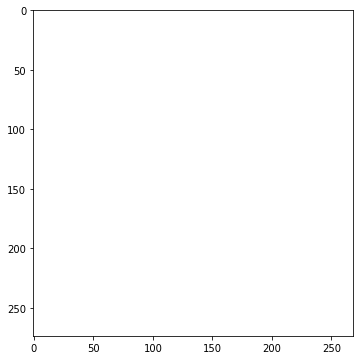

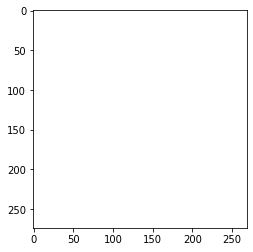

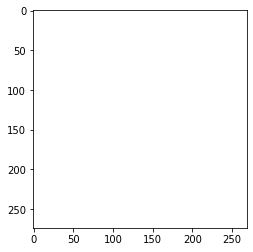

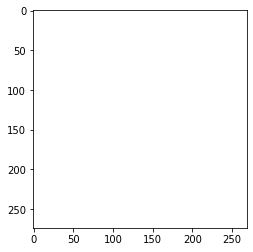

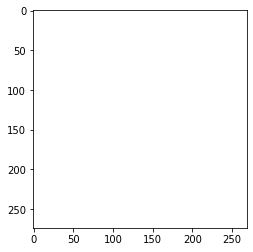

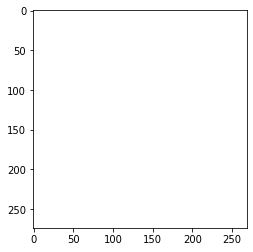

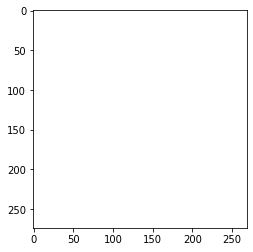

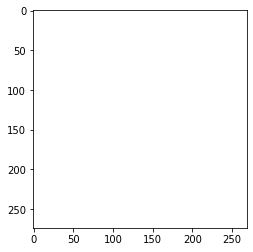

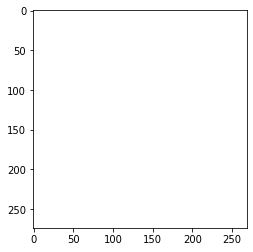

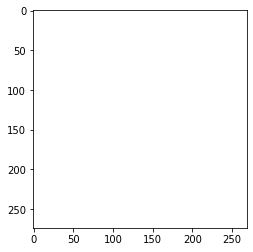

KeyboardInterrupt: 

In [15]:
plt.figure(figsize=(6,6))
for i in range(933):
    plt.imshow(gnom_proj_data[i])
    plt.show()

## FITS Part

### General veriables

In [16]:
# Paths
file = "/data/cassegrain/HI4Pi/HEALPix/HPX_001.fits"
file_obj = fits.open(file)
file_obj.info()

Filename: /data/cassegrain/HI4Pi/HEALPix/HPX_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (1,)   int64   
  1  HI4PI-HPX     1 BinTableHDU     54   65536R x 6C   [1K, 1D, 1D, 1D, 1D, 933E]   


### Data

In [17]:
data = file_obj[1]
data.columns

ColDefs(
    name = 'HPXINDEX'; format = '1K'
    name = 'RA2000'; format = '1D'
    name = 'DEC2000'; format = '1D'
    name = 'GLON'; format = '1D'
    name = 'GLAT'; format = '1D'
    name = 'DATA'; format = '933E'
)

#### Coresponding to:
HEALPIX index，  
right ascension,  
declination,  
galactic longitude,   
galactic latitude，  
spectrum.

In [18]:
PHDU = file_obj[0]
PHDU.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                    1                                                  
EXTEND  =                    T                                                  
CHECKSUM= '8SP4APP22PP28PP2'   / HDU checksum updated 2016-09-12T22:01:41       
DATASUM = '0       '           / data unit checksum updated 2016-09-12T22:01:41 

In [19]:
data.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3772 / length of dimension 1                          
NAXIS2  =                65536 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'HPXINDEX'                                                            
TFORM1  = '1K      '                                                            
TTYPE2  = 'RA2000  '                                                            
TFORM2  = '1D      '                                                            
TTYPE3  = 'DEC2000 '        

### Accessing data

In [20]:
data.data['DATA']

array([[ 0.024984  ,  0.0123178 , -0.0462352 , ..., -0.06259452,
         0.0071709 , -0.00858947],
       [ 0.0331485 ,  0.03397839, -0.06791718, ..., -0.06145255,
         0.00424973,  0.0004196 ],
       [-0.00353338,  0.02656667, -0.03377968, ..., -0.05758023,
        -0.02286791, -0.01216806],
       ...,
       [-0.0138785 , -0.02654546,  0.01742028, ..., -0.01586737,
        -0.00729252,  0.01416069],
       [-0.02151591, -0.02487717,  0.00917102, ..., -0.01074686,
         0.0074978 ,  0.00396557],
       [-0.02996316, -0.0290952 ,  0.00681045, ..., -0.01167516,
        -0.00767165, -0.0016367 ]], dtype=float32)

In [15]:
data.data['DATA'].shape # (positions,frequencies)

(65536, 933)

In [29]:
for i in data.data["GLAT"]:
    print(i)

89.95431463934247
89.90862927142344
89.90862927142344
89.8629438889814
89.8629438889814
89.8629438889814
89.81725848475484
89.81725848475484
89.81725848475484
89.81725848475484
89.7715730514822
89.7715730514822
89.7715730514822
89.7715730514822
89.7715730514822
89.72588758190189
89.72588758190189
89.72588758190189
89.72588758190189
89.72588758190189
89.72588758190189
89.68020206875224
89.68020206875224
89.68020206875224
89.68020206875224
89.68020206875224
89.68020206875224
89.68020206875224
89.63451650477154
89.63451650477154
89.63451650477154
89.63451650477154
89.63451650477154
89.63451650477154
89.63451650477154
89.63451650477154
89.588830882698
89.588830882698
89.588830882698
89.588830882698
89.588830882698
89.588830882698
89.588830882698
89.588830882698
89.588830882698
89.54314519526977
89.54314519526977
89.54314519526977
89.54314519526977
89.54314519526977
89.54314519526977
89.54314519526977
89.54314519526977
89.54314519526977
89.54314519526977
89.49745943522487
89.49745943522487


87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.98974107621403
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.94404852498097
87.9440485

87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.30431517103125
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.25861695210432
87.2586169

86.39025963732661
86.39025963732661
86.39025963732661
86.39025963732661
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513130483
86.3445513

86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.07028889406885
86.02457634391192
86.02457634391192
86.02457634391192
86.02457634391192
86.02457634391192
86.02457634391192
86.02457634391192
86.02457634391192
86.02457634391192
86.0245763

85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.47597428761874
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.43025294009364
85.4302529

84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.97299822403583
84.9729982

84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.65287269425697
84.6528726

84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.24122100392258
84.2412210

83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.87524610351048
83.8752461

83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.50920866050498
83.5092086

83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.18887163070306
83.1888716

82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.86848130256705
82.8684813

82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.59381668063672
82.5938166

82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.31910944312953
82.3191094

82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.04435799073241
82.0443579

81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.76956072182774
81.7695607

81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.540526841881
81.54052

81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.26564140829791
81.2656414

81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.08235656993118
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.03653180667297
81.0365318

80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.85321831509765
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.80738629522925
80.8073862

80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.57820394035754
80.5782039

80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.34898380710825
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.30313516468107
80.3031351

80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.16557987091349
80.1655798

79.98215067728891
79.98215067728891
79.98215067728891
79.98215067728891
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.93628937609785
79.9362893

79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.75282793472046
79.7528279

79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.52346403631134
79.5234640

79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.33994265269425
79.3399426

79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.15639384397079
79.1563938

78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.97281712670633
78.9728171

78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.78921201681206
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.74330624619769
78.7433062

78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.55966496375034
78.5596649

78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.42191467943634
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970197
78.3759941970

78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.23822148039895
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.19229345970841
78.1922934

78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.05449794559584
78.0544979

77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.87074358748788
77.8707435

77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.68695791780974
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.64100655066864
77.6410065

77.50314044755763
77.50314044755763
77.50314044755763
77.50314044755763
77.50314044755763
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.45718105377848
77.4571810

77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.2733231440027
77.27332314400

77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.0894323306314
77.08943233063

76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.90550812217636
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.85952179440939
76.8595217

76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.67555514973878
76.6755551

76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.49155400122626
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.44554826498828
76.4455482

76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.2615032917434
76.26150329174

76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.03139693103451
76.0313969

75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.80123395015599
75.8012339

75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.57101337805753
75.5710133

75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.34073424154306
75.3407342

75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.11039556523174
75.1103955

74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.83390918449932
74.8339091

74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.60343607627445
74.6034360

74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.3267855272382
74.32678552723

74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.0500430219322
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74.00391021103796
74

73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.72705826502845
73.7270582

73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.45011065683619
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.40394330105195
73.4039433

73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.12688191450309
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.08069540024373
73.0806954

72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.8035178877103
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.7573118229907
72.75731182299

72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.43378981960049
72.4337898

72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.06387734475769
72.0638773

71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.6475002354226
71.64750023542

71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.23087858226059
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.18457193407974
71.1845719

70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7676715878136
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.7213335641402
70.72133356414

70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.21140342840246
70.2114034

69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.56182709271206
69.51540362797947
69.51540362797947
69.51540362797947
69.51540362797947
69.51540362797947
69.51540362797947
69.5154036

68.81863913809516
68.81863913809516
68.81863913809516
68.81863913809516
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.77216028974469
68.72567790832346
68.7256779

67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.60901876393669
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.5624452929487
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.51586806719436
67.5158680671943

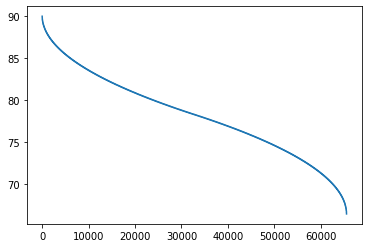

In [27]:
plt.plot(data.data["GLAT"])

In [21]:
print(data.data["GLAT"].shape)
data.data["GLAT"]

(65536,)


array([89.95431464, 89.90862927, 89.90862927, ..., 66.53686368,
       66.53686368, 66.49020166])

Plottng the spectrum

In [45]:
sty = plt.style.available
sty[-7:-1]

['tableau-colorblind10',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'grayscale',
 'seaborn-white']

In [99]:
x = np.linspace(0,933*1.28821,933)
y=data.data["DATA"][0]

In [ ]:
plt.figure(figsize=(10,6),dpi = 200)
fig, ax = plt.subplots(4, 2, sharex='col', sharey='row')
plt.style.use('fivethirtyeight')
plt.ylabel('Antenna temperature / Kelvin')
plt.xlabel('Not Quite Velocity')
plt.xlim((0,933*1288.21))
plt.title('Spectrum at 0 galatic latitute')
plt.plot(x,y)

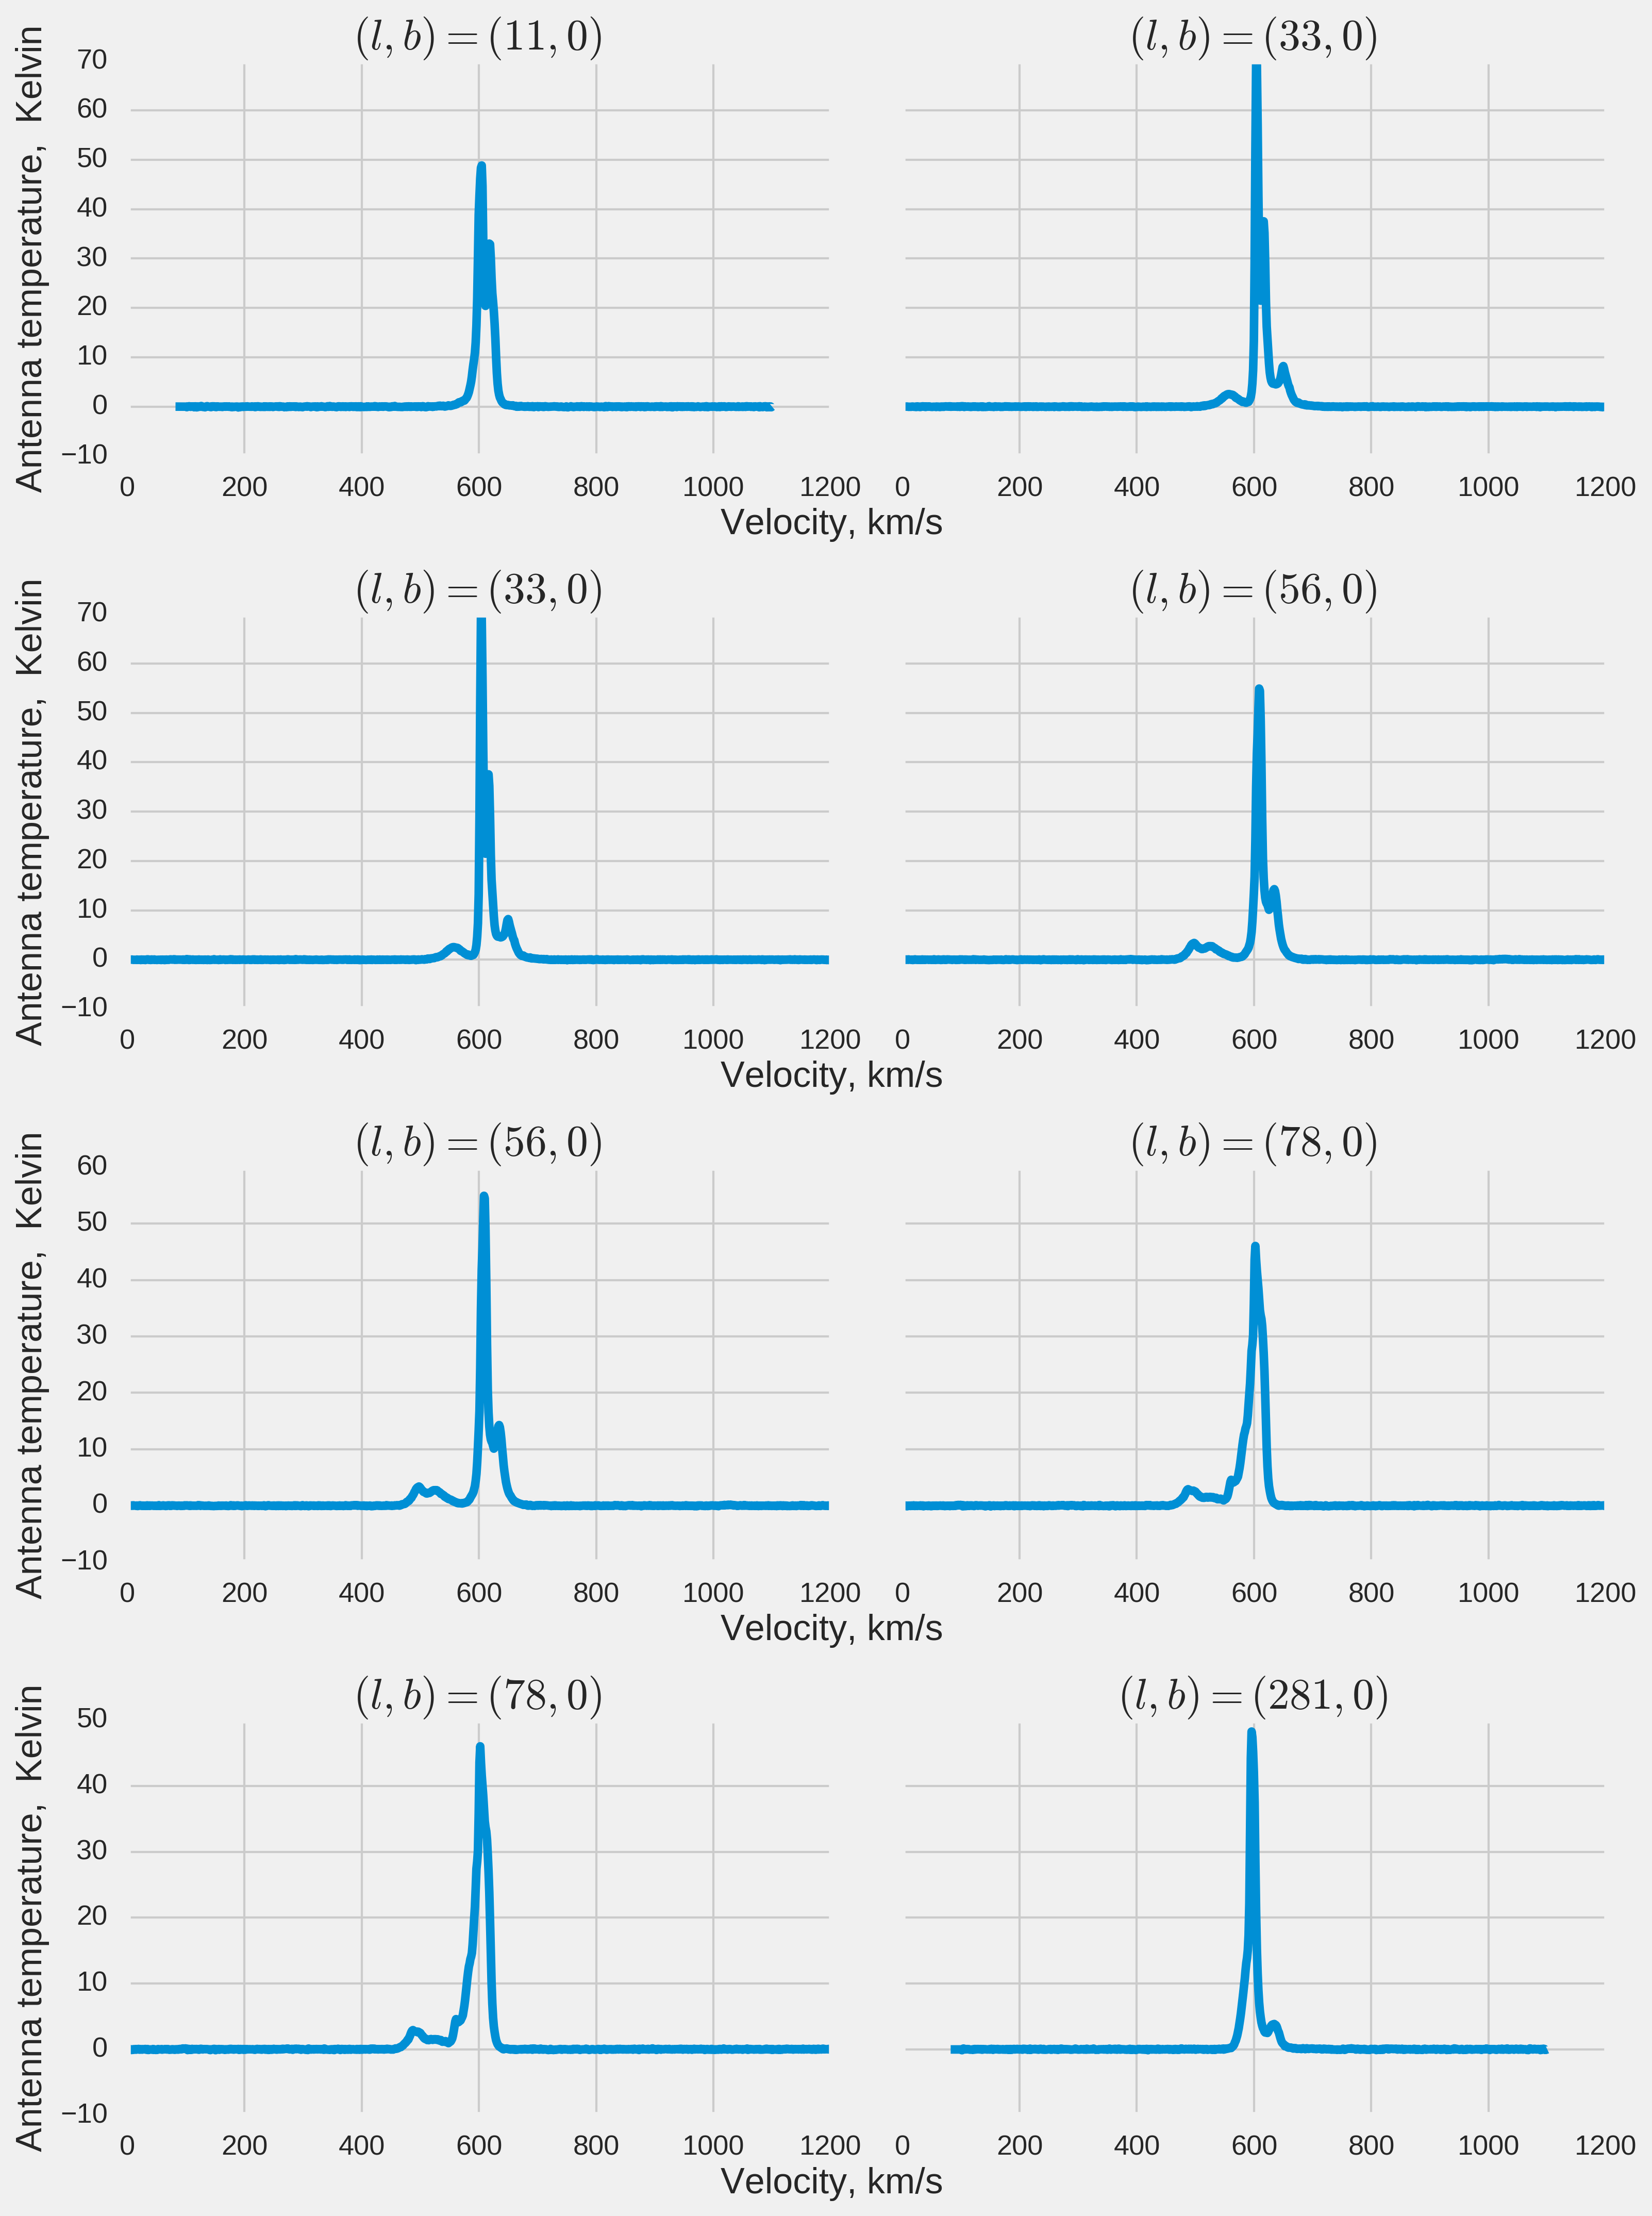

In [125]:
fig,ax = plt.subplots(4, 2, sharey='row')
fig.set_dpi(300)
fig.set_size_inches(11,16)
fig.subplots_adjust(hspace=0.4, wspace=0.1)

file_list = ['HPX_089.fits','HPX_090.fits','HPX_091.fits','HPX_092.fits','HPX_101.fits','HPX_102.fits','HPX_103.fits','HPX_104.fits']

for i in range(4):
    for j in range(2):
        filename = file_list[i+j]
        file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)

        glon_min = np.min(file[1].data.field("GLON"))
        glon_max = np.max(file[1].data.field("GLON"))
        glon = (glon_min + glon_max)/2

        y=file[1].data["DATA"][467]

    #     ax.style.use('fivethirtyeight')
        if j == 0:
            ax[i,j].set_ylabel('Antenna temperature,  Kelvin')
        
            ax[i,j].set_xlabel('Velocity, km/s')
            ax[i,j].xaxis.set_label_coords(1,25*j/4-0.13)
            
        ax[i,j].set_xlim((0,933*1.28821))
        ax[i,j].set_title('$(l,b) =(%2d, 0)$ '%(glon))
        ax[i,j].plot(x,y)
plt.savefig('fqcs.pdf',dpi = 200)

###### Visualisation with healpy

It works in such way that the 'GLON' stores the galatic longtitute and similar in 'GLAT'.  
These two array are just for indexing of the positions in 'DATA'  
**'wavel'** in hp.read_map is the indicator for **central wavelength**

In [16]:
help(hp.gnomview)

Help on function gnomview in module healpy.visufunc:

gnomview(map=None, fig=None, rot=None, coord=None, unit='', xsize=200, ysize=None, reso=1.5, title='Gnomonic view', nest=False, remove_dip=False, remove_mono=False, gal_cut=0, min=None, max=None, flip='astro', format='%.3g', cbar=True, cmap=None, badcolor='gray', bgcolor='white', norm=None, hold=False, sub=None, margins=None, notext=False, return_projected_map=False, no_plot=False)
    Plot a healpix map (given as an array) in Gnomonic projection.
    
    Parameters
    ----------
    map : array-like
      The map to project, supports masked maps, see the `ma` function.
      If None, use a blank map, useful for
      overplotting.
    fig : None or int, optional
      A figure number. Default: None= create a new figure
    rot : scalar or sequence, optional
      Describe the rotation to apply.
      In the form (lon, lat, psi) (unit: degrees) : the point at
      longitude *lon* and latitude *lat* will be at the center. An addit

In [11]:
mp = hp.read_map("/data/cassegrain/HI4Pi/HEALPix/HPX_001.fits", field="DATA", wavel=467)
mp1 = hp.read_map("/data/cassegrain/HI4Pi/HEALPix/HPX_002.fits", field="DATA", wavel=467)

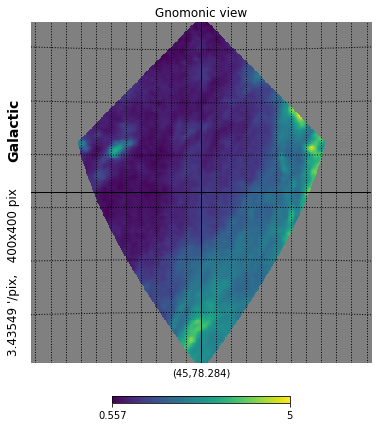

In [18]:
clon = np.median(data.data["GLON"]) #Central position parameters
clat = np.median(data.data["GLAT"]) 
hp.gnomview(mp, rot=(clon, clat, 0), coord="G", xsize=400, reso=hp.nside2resol(1024, arcmin=True))
hp.graticule()

In [45]:
mp = hp.read_map("/data/cassegrain/HI4Pi/HEALPix/HPX_160.fits", field="DATA", wavel=467)
bg = 0

In [ ]:
map=[]

for i,filename in tqdm(
    enumerate(os.listdir('/data/cassegrain/HI4Pi/HEALPix/'))
                      ):
    files_map=hp.read_map('/data/cassegrain/HI4Pi/HEALPix/'+filename,field="DATA", partial=True, wavel=467)
    files_map[files_map == bg]=0
    if i == 0:
        map_tot=files_map
    else:
        map_tot=map_tot+files_map
    fil=fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)
    clon = np.median(fil[1].data.field("GLON"))
    clat = np.median(fil[1].data.field("GLAT"))
    
hp.mollview(map_tot, xsize=4000, coord="G", unit="Density", title="Mollweide view for HI4PI")
hp.graticule()

<Figure size 720x432 with 0 Axes>

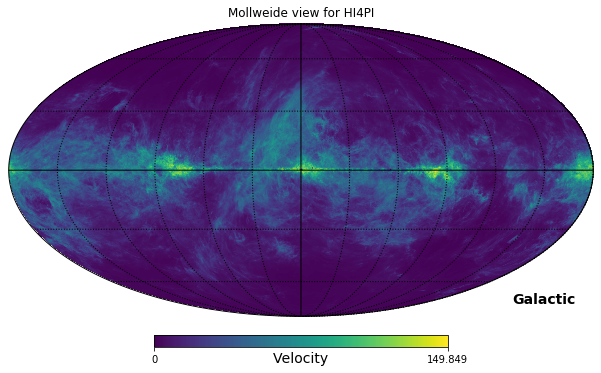

In [162]:
hp.mollview(map_tot, xsize=4000, coord="G", unit="Density", title="Mollweide view for HI4PI")
hp.graticule()

## Rotational curve

#### Tangent method - The velocity at los is the largest
<img src='WeChat Image_20200218132206.jpg' width="400">

In [16]:
def loadfits(filename): 
    '''
    Return the HDU,central pixel wavelength and velocity gradient.
    '''
    file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)
    HDU = file[1]
    vel_grd = HDU.header['1CDLT6']         # Velocity gredient
    cen_pix = '%3d'%(HDU.header['1CRPX6']) 
    return HDU,cen_pix,vel_grd

def cvt2vel(f,filename):
    '''
    Convert the bin indices of pixels to velocity
    '''
    HDU,cen_pix,vel_grd = loadfits(filename)
    vel = (f-int(cen_pix)) * vel_grd
    return vel

def cvt2tot_v(v,l):
    '''
    Convert the velocity from solar local frame to  galatic frame. Unit:m/s
    '''
    v_sun = 200e3 
    v_tot = v+v_sun*np.sin(np.pi*l/180)
    return v_tot

def arg_velmax(filename,noise_thread = 3):
    '''
    Args:
    filename: the fits file to open.
    noise_thread: the back noise level in antena temperature. Suggested to be 5.This means temperature must be above 5 to be considered.
    
    Return:
    return the list of pixel number and the frequency of the highest velocity above the threadhold. 
    '''
    fqcs,indexs = [],[]

    HDU,_,_ = loadfits(filename)
    index = np.argwhere(HDU.data.field("GLAT") == 0)
    index = [i[0] for i in index] ## the args index for where the maximum frequency is found
    
    for idx in index:
        if np.argwhere(
            HDU.data['DATA'][idx]> noise_thread
        ).size > 0:
            arg = np.argwhere(HDU.data['DATA'][idx]> noise_thread).max()
#             max_fqc = HDU.data['DATA'][idx][arg]
            
            fqcs.append(arg)
            indexs.append(idx)
            
    return np.array(indexs),np.array(fqcs)

def arg_velmin(filename,noise_thread = 3):
    '''
    Args:
    filename: the fits file to open.
    noise_thread: the back noise level in antena temperature. Suggested to be 5.This means temperature must be above 5 to be considered.
    
    Return:
    return the list of pixel number and the frequency of the highest velocity above the threadhold. 
    '''
    fqcs,indexs = [],[]

    HDU,_,_ = loadfits(filename)
    index = np.argwhere(HDU.data.field("GLAT") == 0)
    index = [i[0] for i in index] ## the args index for where the maximum frequency is found
    
    for idx in index:
        if np.argwhere(
            HDU.data['DATA'][idx]> noise_thread
        ).size > 0:
            arg = np.argwhere(HDU.data['DATA'][idx]> noise_thread).min()
#             max_fqc = HDU.data['DATA'][idx][arg]
            
            fqcs.append(arg)
            indexs.append(idx)
            
    return np.array(indexs),np.array(fqcs)

### Filter out the files that included the galatic plane

In [235]:
gala_plane_pixel = []
for filename in os.listdir('/data/cassegrain/HI4Pi/HEALPix/'):
    file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)

    glon_min = np.min(file[1].data.field("GLON"))
    glon_max = np.max(file[1].data.field("GLON"))
    glat_min = np.min(file[1].data.field("GLAT"))
    glat_max = np.max(file[1].data.field("GLAT"))
    
#     if (glon_max < 90) and (glat_max * glat_min <= 0):
    if (glon_max < 90 or glon_max > 270) and (glat_max * glat_min <= 0):
        print('The range of GLON, GLAT of %s is (%2d,%2d) and (%2d %2d)'%(filename, np.min(file[1].data.field("GLON")),np.max(file[1].data.field("GLON")),np.min(file[1].data.field("GLAT")),np.max(file[1].data.field("GLAT"))))
        gala_plane_pixel.append(filename)

The range of GLON, GLAT of HPX_101.fits is (270,292) and (-9  9)
The range of GLON, GLAT of HPX_090.fits is (22,44) and (-9  9)
The range of GLON, GLAT of HPX_104.fits is (337,359) and (-9  9)
The range of GLON, GLAT of HPX_089.fits is ( 0,22) and (-9  9)
The range of GLON, GLAT of HPX_091.fits is (45,67) and (-9  9)
The range of GLON, GLAT of HPX_102.fits is (292,314) and (-9  9)
The range of GLON, GLAT of HPX_103.fits is (315,337) and (-9  9)
The range of GLON, GLAT of HPX_092.fits is (67,89) and (-9  9)


#### Find the highest frequency and pixel index in order to have sth to transfer to velocity

In [137]:
HDU.data.field('GLON').shape

(65536,)

In [168]:
filename = 'HPX_104.fits'

idc,f = arg_velmax(filename,noise_thread)
HDU,_,_ = loadfits(filename)

GLON = HDU.data.field('GLON')[idc]
GLAT = HDU.data.field('GLAT')[idc]

f.shape
GLON.shape

/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


(254,)

/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


finished


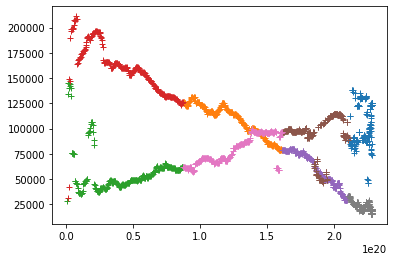

In [249]:
files,vels,Ds= [],[],[]

noise_thread = 10

R0 = 2.28340141e20

for filename in gala_plane_pixel:
# for filename in ['HPX_089.fits','HPX_090.fits','HPX_091.fits','HPX_092.fits']:
# for filename in ['HPX_101.fits','HPX_102.fits','HPX_103.fits','HPX_104.fits']:
    idc,f = arg_velmax(filename,noise_thread)
    HDU,_,_ = loadfits(filename)
    
    GLON = HDU.data.field('GLON')[idc]
    GLAT = HDU.data.field('GLAT')[idc]
    
    max_vels = np.array([cvt2vel(f,filename) for f in f])
    
    D = np.array([np.abs(R0*np.sin(np.pi*GLON/180)) for GLON in GLON])
    
#     print(
#         'For %s, the highest velocity is found at %s, %s kpc away'%(filename,vel,D)
#     )
#     plt.figure()
#     plt.title(filename)
#     plt.plot(D,max_vels)
    
    plt.plot(D,max_vels,'+')
    
    files.append(filename)
    vels.append(max_vels)
    Ds.append(D)
print('finished')
# for d in Ds:
#     plt.plot(d)

In [262]:
a = np.array([1,2,3])
b = np.array([3,2,1])
[a+b for a,b in zip(a,b)]

[4, 4, 4]

/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater


finished


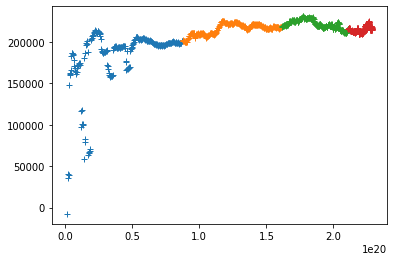

In [44]:
files,vels,Ds= [],[],[]

noise_thread = 13.5

R0 = 2.28340141e20
for filename in ['HPX_089.fits','HPX_090.fits','HPX_091.fits','HPX_092.fits']:#0-90
    idc,f = arg_velmax(filename,noise_thread)
    HDU,_,_ = loadfits(filename)
    
    GLON = HDU.data.field('GLON')[idc]
    GLAT = HDU.data.field('GLAT')[idc]
    
    max_vels = np.array([cvt2vel(f,filename) for f in f]) #cvt from frequency to velocity
    
    max_vels = np.array([cvt2tot_v(v,l) for v,l in zip(max_vels, GLON)]) #cvt from local vel to total vel respect to the galaxy
    
    D = np.array([np.abs(R0*np.sin(np.pi*GLON/180)) for GLON in GLON])
    
#     print(
#         'For %s, the highest velocity is found at %s, %s kpc away'%(filename,vel,D)
#     )
#     plt.figure()
#     plt.title(filename)
#     plt.plot(D,max_vels)
    
    plt.plot(D,max_vels,'+')
    
    files.append(filename)
    vels.append(max_vels)
    Ds.append(D)
print('finished')

/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in greater


finished


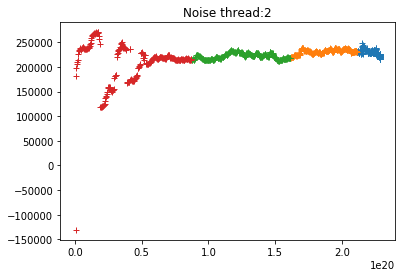

In [61]:
#TODO: Find the best threadhold value by investigating the noise distribution.

files,vels,Ds= [],[],[]

# for noise_thread in np.linspace(2,10,18):

noise_thread = 2

R0 = 2.28340141e20
for filename in ['HPX_101.fits','HPX_102.fits','HPX_103.fits','HPX_104.fits']: #270-360
    idc,f = arg_velmin(filename,noise_thread)
    HDU,_,_ = loadfits(filename)

    GLON = HDU.data.field('GLON')[idc]
    GLAT = HDU.data.field('GLAT')[idc]

    min_vels = np.array([cvt2vel(f,filename) for f in f]) #cvt from frequency to velocity

    min_vels = np.array([cvt2tot_v(v,l) for v,l in zip(min_vels, GLON)]) #cvt from local vel to total vel respect to the galaxy

    D = np.array([np.abs(R0*np.sin(np.pi*GLON/180)) for GLON in GLON])

    plt.plot(D,-min_vels,'+') #add a minus bc sin function....
    plt.title('Noise thread:'+str(noise_thread))

    files.append(filename)
    vels.append(min_vels)
    Ds.append(D)
print('finished')

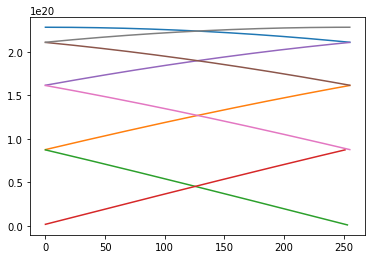

In [231]:
for Ds in Ds:
    plt.plot(Ds)

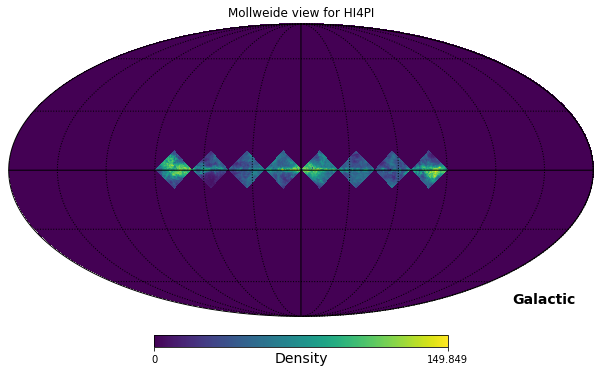

In [20]:
map=[]

for i,filename in enumerate(files):
    files_map=hp.read_map('/data/cassegrain/HI4Pi/HEALPix/'+filename,field="DATA", partial=True, wavel=467)
    files_map[files_map <= 0]=0
    if i == 0:
        map_tot=files_map
    else:
        map_tot=map_tot+files_map
    fil=fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)
    
hp.mollview(map_tot, xsize=4000, coord="G", unit="Density", title="Mollweide view for HI4PI")
hp.graticule()

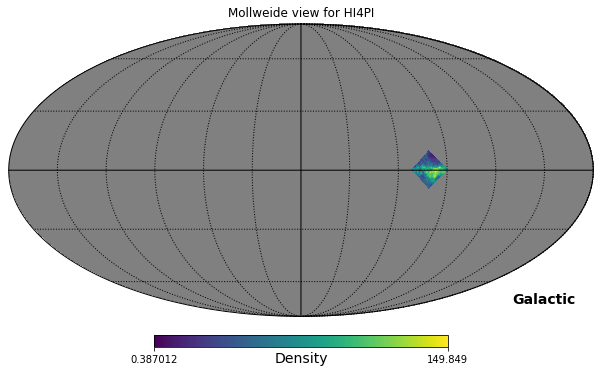

In [18]:
mp = hp.read_map("/data/cassegrain/HI4Pi/HEALPix/HPX_101.fits", field="DATA", wavel=467)
hp.mollview(mp, xsize=4000, coord="G", unit="Density", title="Mollweide view for HI4PI")
hp.graticule()

In [121]:
order = np.argsort(np.abs(Ds))
Ds = np.array(np.abs(Ds))
Ds[order]

array([0.39281684, 2.04252836, 4.27777778, 7.06750082, 7.39819682,
       7.43227501, 7.6013922 , 8.10568917])

In [99]:
rc = np.zeros((len(Ds),2))
for i in range(len(Ds)):
    x = (np.abs(Ds[i]),vels[i])
    rc[i] = x

In [101]:
rc

array([[7.60139220e+00, 1.52009366e+05],
       [3.92816840e-01, 1.44280077e+05],
       [8.10568917e+00, 1.77773666e+05],
       [4.27777778e+00, 2.79542648e+05],
       [7.43227501e+00, 9.66161227e+04],
       [7.39819682e+00, 2.26725835e+05],
       [7.06750082e+00, 1.12074702e+05],
       [2.04252836e+00, 6.69871784e+04]])

In [116]:
rc = rc[np.argsort(rc[:,0])]
rc[:,1]

array([144280.07654191,  66987.17839446, 279542.64829995, 112074.70231381,
       226725.83456586,  96616.12268432, 152009.36635666, 177773.66573914])

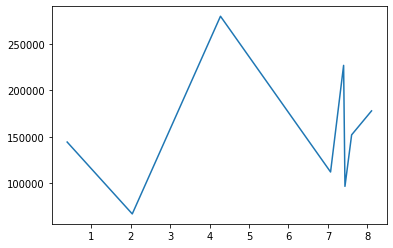

In [113]:
plt.figure()
x,y = rc[:,0],rc[:,1]
plt.plot(x,y)

In [56]:
y

array([0.39281684, 2.04252836, 4.27777778, 7.06750082, 7.39819682,
       7.43227501, 7.6013922 , 8.10568917])

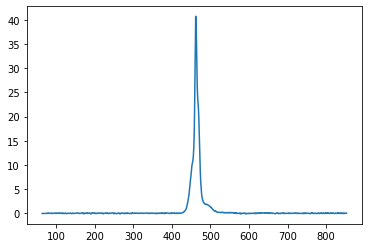

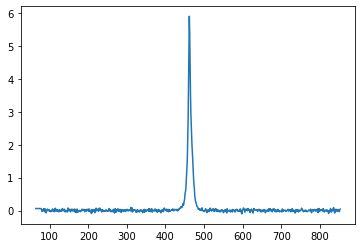

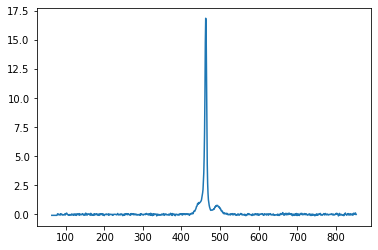

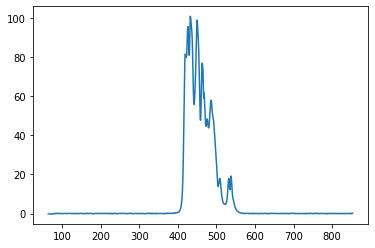

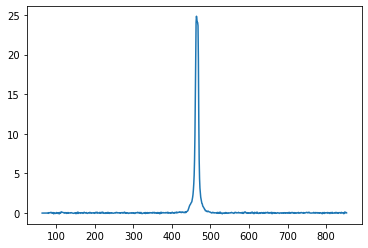

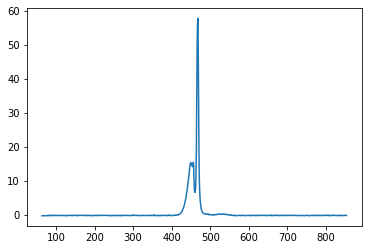

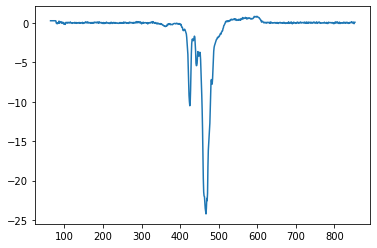

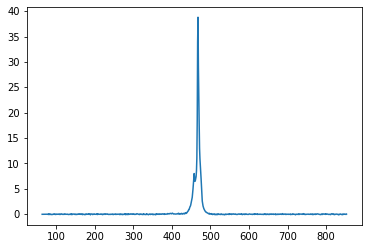

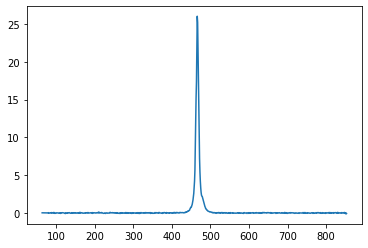

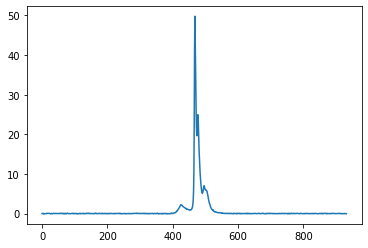

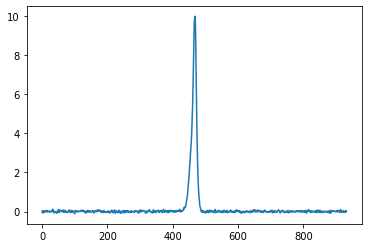

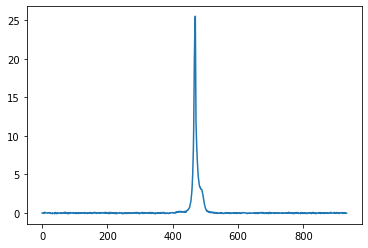

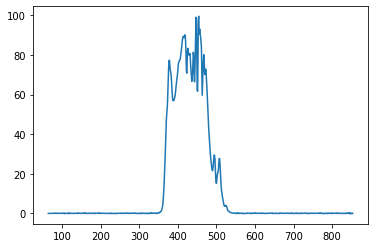

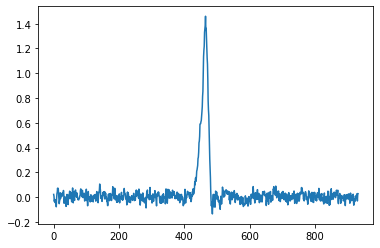

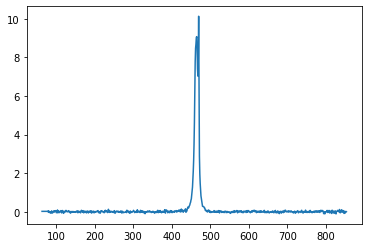

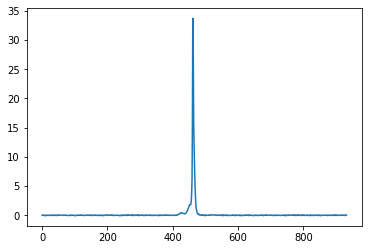

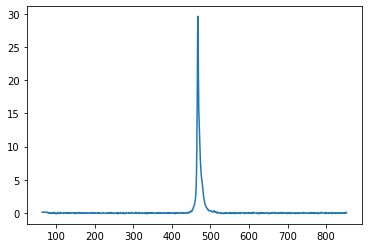

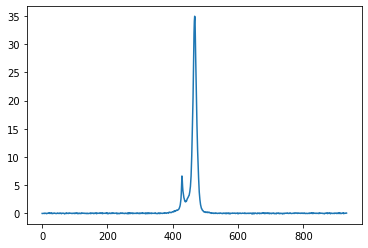

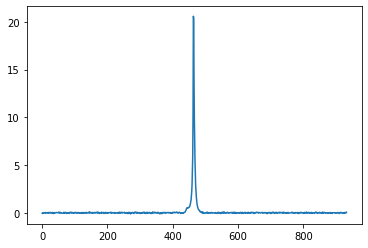

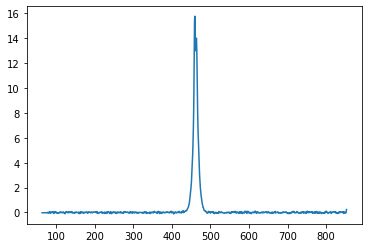

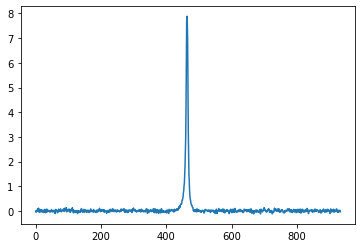

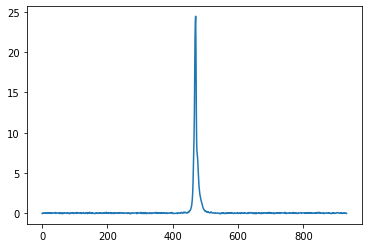

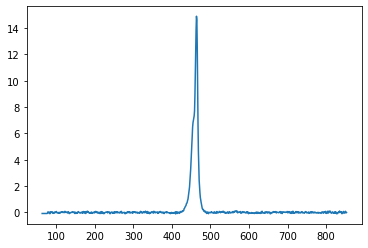

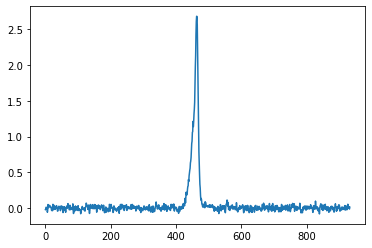

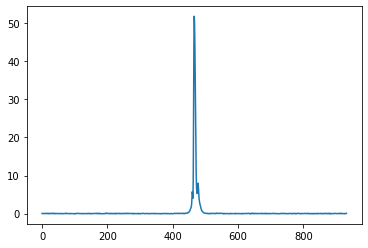

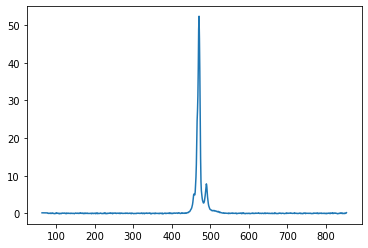

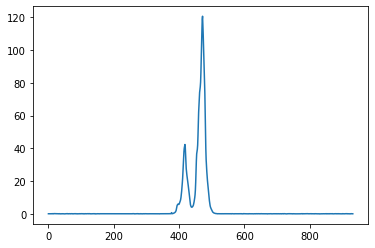

KeyboardInterrupt: 

In [6]:
for filename in os.listdir('/data/cassegrain/HI4Pi/HEALPix/'):
    file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)
    HDU = file[1]
    GLON_max = np.max(file[1].data.field("GLON"))
#     GLAT_min, GLAT_max = np.min(file[1].data.field("GLAT")),np.max(file[1].data.field("GLAT"))

    if GLON_max < 90 or GLON_max > 270:
#         plt.figure(figsize=(10,6))
        plt.plot(HDU.data["DATA"][0]) 
        plt.show()

In [22]:
files,fit_args,GLONs,GLATs= [],[],[],[]

noise_thread = 3

for filename in os.listdir('/data/cassegrain/HI4Pi/HEALPix/'):
    args = arg_velmax(filename,noise_thread)
    idc,vel = args[0],args[1]
    HDU,_,_ = loadfits(filename)
    GLON = HDU.data.field('GLON')[idc]
    GLAT = HDU.data.field('GLAT')[idc]
    print(
        'For %s, the highest velocity is found at %s'%(filename,args)
    )
    files.append(filename)
    fit_args.append(args)
    GLONs.append(GLON)
    GLATs.append(GLAT)
print('finished')

For HPX_065.fits, the highest velocity is found at (65323, 491)


/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


For HPX_101.fits, the highest velocity is found at (26179, 584)
For HPX_192.fits, the highest velocity is found at (20460, 631)
For HPX_130.fits, the highest velocity is found at (594, 509)
For HPX_054.fits, the highest velocity is found at (63205, 662)
For HPX_094.fits, the highest velocity is found at (32676, 482)
For HPX_119.fits, the highest velocity is found at (4568, 728)
For HPX_152.fits, the highest velocity is found at (28476, 505)
For HPX_036.fits, the highest velocity is found at (59368, 506)
For HPX_007.fits, the highest velocity is found at (434, 470)
For HPX_163.fits, the highest velocity is found at (1725, 486)
For HPX_128.fits, the highest velocity is found at (12189, 488)
For HPX_134.fits, the highest velocity is found at (3810, 684)
For HPX_050.fits, the highest velocity is found at (63737, 486)
For HPX_061.fits, the highest velocity is found at (53613, 484)
For HPX_105.fits, the highest velocity is found at (31, 610)
For HPX_088.fits, the highest velocity is found at

For HPX_097.fits, the highest velocity is found at (32639, 506)
For HPX_189.fits, the highest velocity is found at (16836, 473)
For HPX_004.fits, the highest velocity is found at (27564, 476)
For HPX_160.fits, the highest velocity is found at (2336, 486)
For HPX_018.fits, the highest velocity is found at (64196, 474)
For HPX_137.fits, the highest velocity is found at (40317, 496)
For HPX_053.fits, the highest velocity is found at (50710, 638)
For HPX_062.fits, the highest velocity is found at (57111, 482)
For HPX_106.fits, the highest velocity is found at (13731, 572)
For HPX_029.fits, the highest velocity is found at (65296, 473)
For HPX_164.fits, the highest velocity is found at (120, 492)
For HPX_155.fits, the highest velocity is found at (15454, 500)
For HPX_031.fits, the highest velocity is found at (38108, 579)
For HPX_093.fits, the highest velocity is found at (63656, 491)
For HPX_067.fits, the highest velocity is found at (64108, 514)
For HPX_103.fits, the highest velocity is f

In [25]:
filename = 'HPX_166.fits'
HDU,_,_ = loadfits(filename)

In [68]:
args = arg_velmax(filename,noise_thread)

/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/local/environments/obs/obs-python36/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


In [69]:
idc,vel = args[0],args[1]

In [70]:
GLON = HDU.data.field('GLON')[idc]
GLAT = HDU.data.field('GLAT')[idc]
print(
    'For %s, the highest velocity is found at %s'%(filename,args)
)

For HPX_166.fits, the highest velocity is found at (40354, 657)


In [66]:
GLON

294.90423387096774

In [43]:
vels = np.array([x[1] for x in fit_args]) 
idcs = np.array([x[0] for x in fit_args]) 